In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

#this is how you can print the version
print('sklearn: {}'.format(sklearn.__version__))

sklearn: 0.22.1


In [3]:
#load the data

data = pd.read_csv('creditcard.csv')

In [4]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
print(data.shape)

(284807, 31)


In [6]:
print(data.describe)

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [7]:
#cutting the dataset down... and so we get the equally distributed data we will use random state
data = data.sample(frac = 0.1, random_state = 1)

In [8]:
print(data.shape)

(28481, 31)


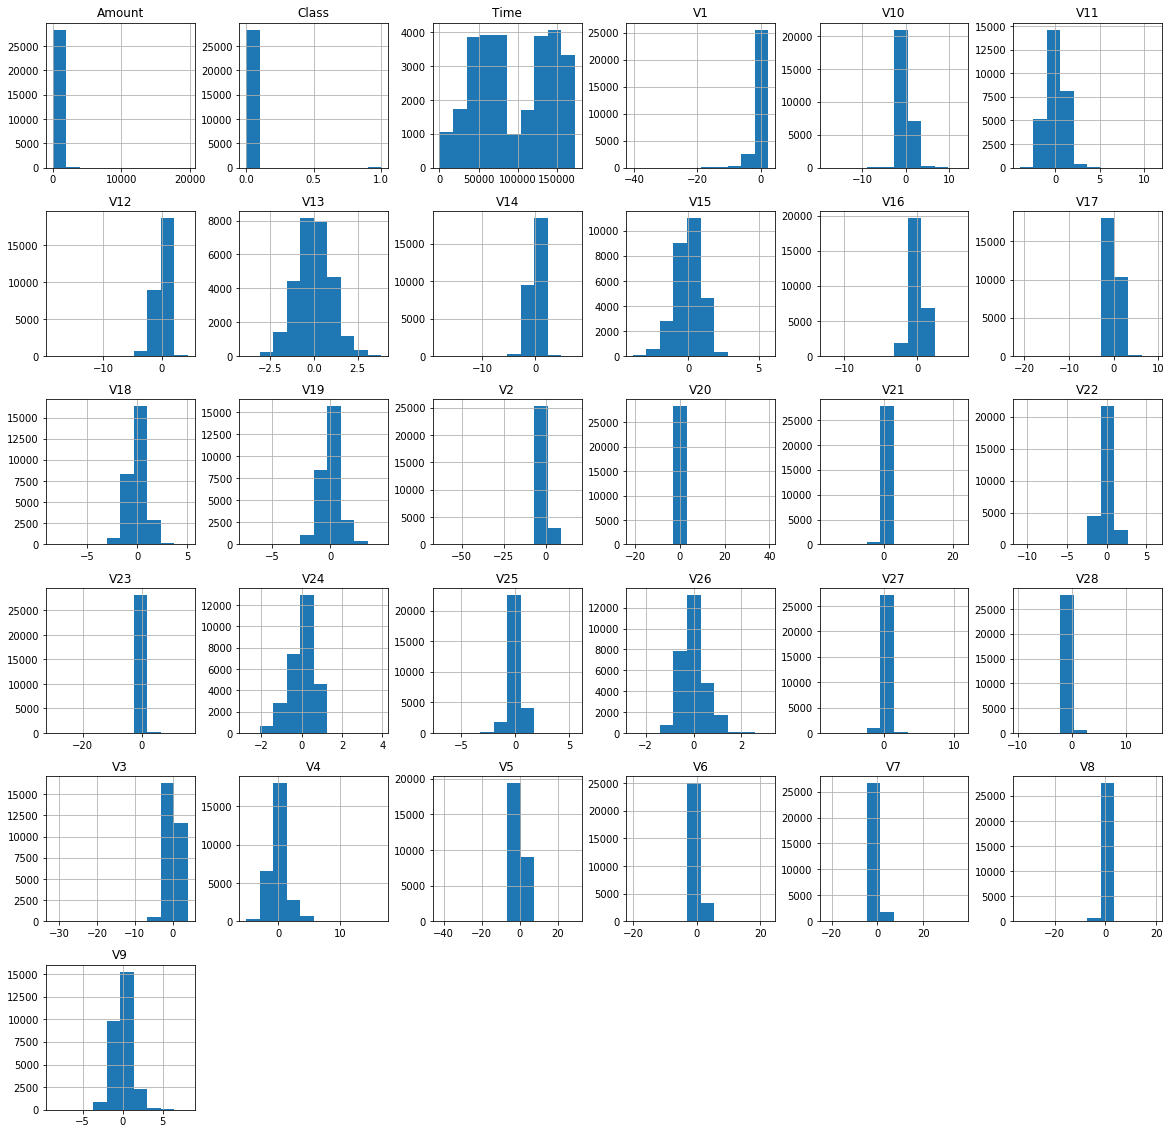

In [18]:
data.hist()
plt.rcParams["figure.figsize"]=30,20
plt.show()

In [9]:
fraud = data[data['Class']==1]
valid = data[data['Class']==0]

outlier_fraction = len(fraud)/float(len(valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(fraud)))
print('valid Cases: {}'.format(len(valid)))

0.0017234102419808666
Fraud Cases: 49
valid Cases: 28432


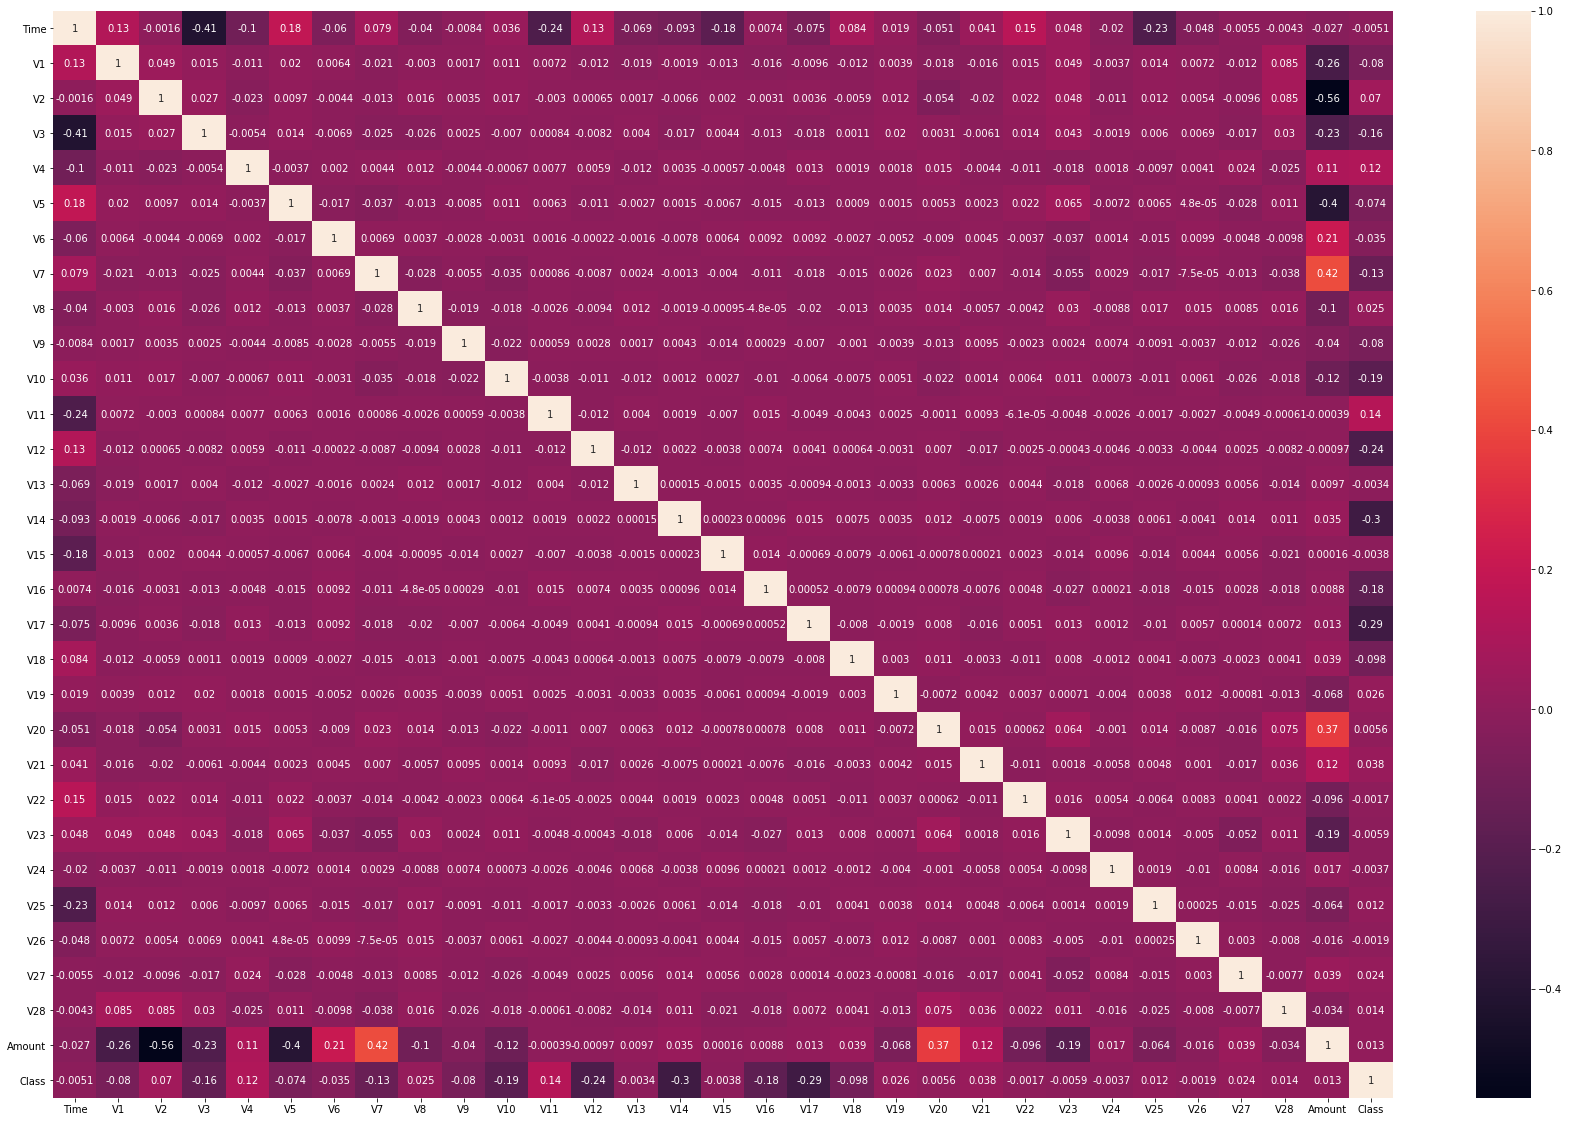

In [27]:
corrmat = data.corr()
fig = plt.figure()

sns.heatmap(corrmat,annot = True)
plt.show()

In [10]:
columns = data.columns.tolist()

columns = [c for c in columns if c not in ['class']]

target = "Class"

x = data[columns]
y = data[target]

print(x.shape)
print(y.shape)

(28481, 31)
(28481,)


In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 

In [12]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

state = 1

#defining outlier detection methods
classifiers = {
    "isolation forest": IsolationForest(max_samples = len(x),
                                       contamination = outlier_fraction,
                                       random_state = state),
    "local outlier fractor": LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction,
    novelty=True)
}

In [15]:

n_outliers = len(fraud)
for i,(clf_names,clf) in enumerate(classifiers.items()):
    if clf_names =="Local outlier Factor":
        y_pred = clf.fit_pridict(X_test)
        pred_scores = clf.negative_outlier_factor_
    else:
        clf.fit(X_train,y_train)
        scores_pred = clf.decision_function(X_train)
        y_pred = clf.predict(X_test)
        
        #reshaping the detected outlier values to 0 and 1 (accordeing to the orginal values in the dataset)
        
        y_pred[y_pred == 1]=0
        y_pred[y_pred == -1]=1
        
        n_errors = (y_pred != y_test).sum()
        
        print('{} : {}'.format(clf_names,n_errors))
        print(accuracy_score(y_test, y_pred))
        print(classification_report(y_test,y_pred))
        
         
  
        
        
        

C:\Users\VIBHU\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:281: UserWarning: max_samples (28481) is greater than the total number of samples (22784). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))


isolation forest : 14
0.9975425662629455
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5691
           1       0.10      0.17      0.12         6

    accuracy                           1.00      5697
   macro avg       0.55      0.58      0.56      5697
weighted avg       1.00      1.00      1.00      5697

local outlier fractor : 17
0.9970159733192908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5691
           1       0.00      0.00      0.00         6

    accuracy                           1.00      5697
   macro avg       0.50      0.50      0.50      5697
weighted avg       1.00      1.00      1.00      5697



In [14]:
fraud = X_test[X_test['Class']==1]
print(len(fraud))

6
